# Проект по дисциплине "Анализ данных в Python"

Загрузим датафрейм и выведем первые 5 строчек

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt


pokemon = pd.read_csv('Pokemon1.csv', sep=',')
pokemon.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Этап 1. Описание

In [2]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Источник данных: https://www.kaggle.com/datasets/abcsds/pokemon

Этот набор данных включает 800 покемонjd, в том числе их следующие данные: номер, имя, первый и второй тип, а также основные статистические показатели: HP, атака, защита, специальная атака, специальная защита и скорость.

**Рассмотрим каждый столбец подробнее:**

ID для каждого покемона (int, дискретная переменная)

Name: Имя каждого покемона (object, номинальная переменная)

Type 1: У каждого покемона есть тип, который определяет слабость/устойчивость к атакам. (object, номинальная переменная)

Type 2: некоторые покемоны имеют двойной тип и 2 типа. (object, номинальная переменная)

Total: сумма всех статистик, которые идут после этого, общее руководство по тому, насколько силен покемон (int, дискретная переменная)

HP: хит-пойнты, или здоровье, определяют, сколько урона может выдержать покемон, прежде чем потеряет сознание (int, дискретная переменная)

Attack: базовый модификатор для обычных атак (например, Царапина, Удар) (int, дискретная переменная)

Defense: базовое сопротивление урону от обычных атак (int, дискретная переменная)

Sp. Atk: специальная атака, базовый модификатор для специальных атак (например, огненный взрыв, луч пузыря) (int, дискретная переменная)

Sp. Def: базовое сопротивление урону от специальных атак. (int, дискретная переменная)

Speed: определяет, какой покемон атакует первым в каждом раунде (int, дискретная переменная)

Generation: поколение покемона (int, дискретная переменная)

Legendary: легендарность покемона (bool, бинарная переменная)

# Этап 1. Фильтрация

1. Найдем количество легендарных покемонов

In [3]:
pokemon[(pokemon['Legendary'] == True)].shape[0]

65

Вывели тех покемонов, которые являются легендарными и выяснили, что в нашем датасете их 65

2. Найдем количество покемонов, принадлежащих огненному типу

In [4]:
pokemon[pokemon['Type 1'] == 'Fire'].shape[0]

52

Мы узнали, что у нас 52 покемона, которые принадлежат Огненным типам

3. Посчитаем, сколько всего покемонов, у которых общая сила выше средней силы всех покемонов

In [5]:
pokemon[(pokemon['Legendary'] == False)
& (pokemon['Total'] > pokemon['Total'].mean())].shape[0]

352

мы выяснили, что всего 352 покемона, чья общая сила (Total) выше средней

4. Найдем огненных покемонов, у которых общая сила больше средней силы среди всех покемонов

In [6]:
pokemon[(pokemon['Type 1'] == 'Fire') & (pokemon['Total'] > pokemon['Total'].mean())].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
43,38,Ninetales,Fire,NaN,505,73,76,75,81,100,100,1,False
64,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False


Мы узнали, что у нас всего 29 огненных покемонов, чья общя сила больше среднего всех всех покемонов

5. Найдем количество покемонов 2-го поколения

In [7]:
pokemon[(pokemon['Generation'] == 2)].shape[0]

106

Мы выяснили, что у нас всего 106 покемонов второго поколения

6. Найдем покемона с максимальной атакой

In [8]:
pokemon[(pokemon['Attack'] == pokemon['Attack'].max())]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


Мы узнали, что самый сильный покемон - это MewtwoMega Mewtwo X под номером (id) 150

7. Найдем трех самых сильных покемонов

In [9]:
pokemon[pokemon['Total'] == pokemon['Total'].max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


Мы выяснили, что 3 самых сильных покемонов - это MewtwoMega Mewtwo X, MewtwoMega Mewtwo Y, RayquazaMega Rayquaza

8. Найдем самого быстрого покемона

In [10]:
pokemon[pokemon['Speed'] == pokemon['Speed'].max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True


cамый быстрый покемон - это DeoxysSpeed Forme

# Этап 1. Сортировка

1. Отсортируем от самого сильного до самого слабого покемона

In [11]:
pokemon.sort_values('Total', ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
288,265,Wurmple,Bug,NaN,195,45,45,35,20,30,20,3,False
446,401,Kricketot,Bug,NaN,194,37,25,41,25,41,25,4,False
322,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False


2. Отсортируем покемонов по их Поколению (Generation) и по их имени в алфавитном порядке и по их Поколению

In [12]:
pokemon.sort_values(['Generation', 'Name'], ascending=(False, True))

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
750,681,AegislashBlade Forme,Steel,Ghost,520,60,150,50,150,50,60,6,False
751,681,AegislashShield Forme,Steel,Ghost,520,60,50,150,50,150,60,6,False
768,698,Amaura,Rock,Ice,362,77,59,50,67,63,46,6,False
753,683,Aromatisse,Fairy,NaN,462,101,72,72,99,89,29,6,False
769,699,Aurorus,Rock,Ice,521,123,77,72,99,92,58,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,70,Weepinbell,Grass,Poison,390,65,90,50,85,45,55,1,False
118,110,Weezing,Poison,NaN,490,65,90,120,85,70,60,1,False
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True


3. Отсортируем покемонов по их скорости и так найдем самого медленного покемона.

In [13]:
pokemon.sort_values('Speed', ascending=True)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
495,446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
658,597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False
486,438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False
359,328,Trapinch,Ground,NaN,290,45,100,45,45,45,10,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
428,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
315,291,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False


# Этап 2. Частотные таблицы

**Частотная таблица по общей силе**

In [14]:
frequency_table_total = pokemon['Total'].value_counts()
frequency_table_total

600    37
405    26
580    23
500    23
300    19
       ..
352     1
334     1
454     1
640     1
514     1
Name: Total, Length: 200, dtype: int64

Чаще всего встречаются покемоны чья Общая сила == 600

**Частотная табоица по типу 1**

In [15]:
frequency_table_type_1 = pokemon['Type 1'].value_counts()
frequency_table_type_1

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

Больше всего покемонов с типом воды, меньше всего покемонов с типом полета (Flying)

**Частотная табоица по типу 2**

In [16]:
frequency_table_type_2 = pokemon['Type 2'].value_counts()
frequency_table_type_2

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

На удивление, покемонов с типом 2 летание (Flying) больше всего. Странная зависимость.

**Частотная таблица по Total**

In [17]:
frequency_table = pokemon['Total'].value_counts().sort_index()

print(frequency_table)

180     1
190     1
194     1
195     3
198     1
       ..
680    13
700     9
720     1
770     2
780     3
Name: Total, Length: 200, dtype: int64


У самого крутого покемона Total равен 780, всего таких покемонов 3, а вот самый низкий Total - 180.

**Частотная таблица по HP**

In [18]:
frequency_table_hp = pokemon['HP'].value_counts().sort_index()
frequency_table_hp

1      1
10     1
20     6
25     2
28     1
      ..
165    1
170    1
190    1
250    1
255    1
Name: HP, Length: 94, dtype: int64

Самый высокий уровень здоровья - 255, а самый низкий - 1.

**Частотная таблица по Attack**

In [19]:
frequency_table_attack = pokemon['Attack'].value_counts().sort_index()
frequency_table_attack

5      2
10     3
15     1
20     8
22     1
      ..
165    3
170    2
180    3
185    1
190    1
Name: Attack, Length: 111, dtype: int64

Самый слабый урон от атаки - 5.Чтобы убить самого сильного покемона, для покемона с силой 5 понадобится сделать 255 / 5 = 51 удар (*если не брать в расчет уровень Defense и у каждого покемона*)

Самый сильный удар - 190. Таким ударом получится убить с первого раза всех покемонов, кроме двух самых живучих (у них HP 250 и 255)

**Частотная таблица по Defense**

In [20]:
frequency_table_defense = pokemon['Defense'].value_counts().sort_index()
frequency_table_defense

5      2
10     1
15     4
20     4
23     1
      ..
168    1
180    3
184    1
200    2
230    3
Name: Defense, Length: 103, dtype: int64

У нас есть только 1 покемон, у кого уровень защиты (Defense) равен 1. Значит, что если у него HP меньше 190, то самый сильный покемон убьет его с 1 удара.

**Частотная таблица по Скорости атаки (Sp. Atk)**

In [21]:
frequency_table_sp_atk = pokemon['Sp. Atk'].value_counts().sort_index()
frequency_table_sp_atk.sort_values().head(2)

194    1
86     1
Name: Sp. Atk, dtype: int64

Чаще всего встречаются покемоны со скоростью атаки равной 60 (их 51), есть всего 1 покемон с самой высокой скоростью атаки == 194.
Чтобы узнать самую высокую скорость атаки можно прописать: «pokemon['Sp. Atk'].sort_values()»

**Частотная таблица по Sp. Def**

In [ ]:
frequency_table_sp_def = pokemon['Sp. Def'].value_counts().sort_index()
frequency_table_sp_def.sort_values()

230     1
51      1
126     1
64      1
113     1
       ..
60     43
65     44
55     47
50     50
80     52
Name: Sp. Def, Length: 92, dtype: int64

Чаще всего встречаются покемоны со скоростью защиты (Sp. Def) == 80 (*таких покемонов 52*).

**Частотная таблица по Speed**

In [ ]:
frequency_table_speed = pokemon['Speed'].value_counts().sort_index()
frequency_table_speed.sort_values()

180     1
54      1
160     1
49      1
79      1
       ..
30     35
65     36
70     37
60     44
50     46
Name: Speed, Length: 108, dtype: int64

Чаще всего встречаются покемоны со скоростью == 50 (*таких покемонов 46*).

**Частотная таблица по Generation**

In [ ]:
frequency_table_generation = pokemon['Generation'].value_counts().sort_index()
frequency_table_generation

1    166
2    106
3    160
4    121
5    165
6     82
Name: Generation, dtype: int64


У нас больше всего покемонов в 1-м поколении (*их 166*).
Меньше всего - в 6-м (*их 82*).

**Частотная табоица по Legendary**

In [ ]:
frequency_table_legendary = pokemon['Legendary'].value_counts()
frequency_table_legendary

False    735
True      65
Name: Legendary, dtype: int64


У нас только 65 легендарных покемонов, остальные (735) - нелегендарные.

# Этап 2. Частотные таблицы по отфильтрованным данным

1. Рассмотрим частотные таблицы по легендарным покемонам и по обыкновенным покемонам

**Частотная таблица Total легендарных покемонов**

In [22]:
dt = pokemon[(pokemon['Legendary'] == True)]
frequency_table_legendary_total = dt['Total'].value_counts().sort_index()

frequency_table_legendary_total

580    19
600    18
660     1
670     3
680    13
700     5
720     1
770     2
780     3
Name: Total, dtype: int64

**Частотная таблица Total по обыкновенным покемонам**

In [ ]:
dt = pokemon[(pokemon['Legendary'] == False)]
frequency_table_basic_total = dt['Total'].value_counts().sort_index()

frequency_table_basic_total

180    1
190    1
194    1
195    3
198    1
      ..
634    2
635    1
640    1
670    1
700    4
Name: Total, Length: 195, dtype: int64

**Выводы:** у обыкновенных покемонов Total варьируется от 180 до 700, а вот у легендарных покемонов минимальное - 580 (!!!), максимальное 780

Отчетливо наблюдается преимущество у легендарных покемонтов

**Частотная таблица поколения у легендарных покеменов**

In [ ]:
dt = pokemon[(pokemon['Legendary'] == True)]
frequency_table_legendary_generation = dt['Generation'].value_counts().sort_index()

frequency_table_legendary_generation

1     6
2     5
3    18
4    13
5    15
6     8
Name: Generation, dtype: int64

**Частотная таблица поколения у обыкновенных покемонов**

In [ ]:
dt = pokemon[(pokemon['Legendary'] == False)]
frequency_table_legendary_generation = dt['Generation'].value_counts().sort_index()

frequency_table_legendary_generation

1    160
2    101
3    142
4    108
5    150
6     74
Name: Generation, dtype: int64

**Вывод:** Среди легендарных покемонов сильно выделяется количество покемонов 3-5 поколений, а вот среди обыкновенных покемонов большим количеством не выделяются какие-то определенные поколения, скорее только можно сказать, что поколение 6 среди обыкновенныз покемонов встречается заметне реже остальных

# Этап 2. Новая переменная

Мы внимательно рассмотрели атрибут Total. Давайте разделим покемонов на сильных (Strong) и базовых (Basic). Как лучше это сделать? Назовем столбец Total_type

Мы заметили, что у легендарных покемонов Total в среднем сильно выше, чем у обыкновенных. Давайте считать, что, если Total находится в рамках Total легендарных покемонов, следует, это Strong

Тогда 580 <= Strong <= 780

соответственно Basic < 580

In [23]:
pokemon['Total_type'] = np.where(pokemon['Total'] < 580, 'Basic', 'Strong')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Basic
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Basic
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Basic
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Strong
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Basic


# Этап 3. Мера центральной тенденции

0. Посмотрим на меры центральной тенденции в общем виде

In [ ]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


1. Посмотрим на меры центральной тенденции (далее - МЦТ) у Total

In [25]:
total_mct = pokemon['Total']
total_mct.mode()

0    600
Name: Total, dtype: int64

In [26]:
total_mct.mean()

435.1025

In [27]:
total_mct.median()

450.0

заметим, что распределение у Total ненормальное: среднее почти совпадает с медианой, но мода находится далеко от этих значений, в датасете много покемонов, у кого Total выше среднего и медианы, но при этом есть слабые покемоны, которые смещают среднее и медиану в другую сторону.

2. Теперь посмотрим на МЦТ по HP

In [ ]:
hp_mct = pokemon['HP']
hp_mct.mean()

69.25875

In [ ]:
hp_mct.median()

65.0

In [ ]:
hp_mct.mode()

0    60
dtype: int64

здесь же, наоборот, распределение скорее нормальное, поскольку мода, среднее и медиана почти равны

3. Далее изучим МЦТ по Атаке (Attack)

In [28]:
att_mct = pokemon['Attack']
att_mct.mean()

79.00125

In [ ]:
att_mct.median()

75.0

In [ ]:
att_mct.mode()

0    100
dtype: int64

здесь та же история, что и у Total: среднее почти равно медиане, а мода значительно выше. Чаще встречается Атака выше среднего.

4. Затем взглянем на МЦТ по Защите (Defense)

In [29]:
def_mct = pokemon['Defense']
def_mct.mean()

73.8425

In [ ]:
def_mct.mode()

0    70
dtype: int64

In [ ]:
def_mct.median()

70.0

мы видим, что распределение почти идеально нормальное. Это значит, что чаще всего встречается среднее значение среди покемонов.

5. Далее посмотрим какая ситуация с МЦТ у Скорости атаки (Sp. Atk)

In [30]:
sp_atk_mct = pokemon['Sp. Atk']
sp_atk_mct.mode()

0    60
Name: Sp. Atk, dtype: int64

In [ ]:
sp_atk_mct.median()

65.0

In [ ]:
sp_atk_mct.mean()

72.82

в скорости атаки ситуация немного необычная: среднее больше медианы и моды. Это значит, что в нашем датасете есть несколько покемонов с высоким уровнем скорости атаки, что смещает среднее вправо.

6. Перейдем к МЦТ у Скорости защиты (Sp. Def)

In [31]:
sp_def_mct = pokemon['Sp. Def']
sp_def_mct.mode()

0    80
Name: Sp. Def, dtype: int64

In [ ]:
sp_def_mct.mean()

71.9025

In [ ]:
sp_def_mct.median()

70.0

Здесь уже типичная для нас ситуация: чаще встречаются значения, которые выше среднего и медианы, а последние между собой почти равны.

7. Перейдем к МЦТ у Скорости (Speed)

In [ ]:
sp_mct = pokemon['Speed']
sp_mct.mode()

0    50
dtype: int64

In [ ]:
sp_mct.median()

65.0

In [ ]:
sp_mct.mean()

68.2775

Тут уже ситуация обратная: медиана и средняя почти равны, но чаще встречается низкая скорость у покемонов.

# Этап 3. Выбросы, ящик с усами

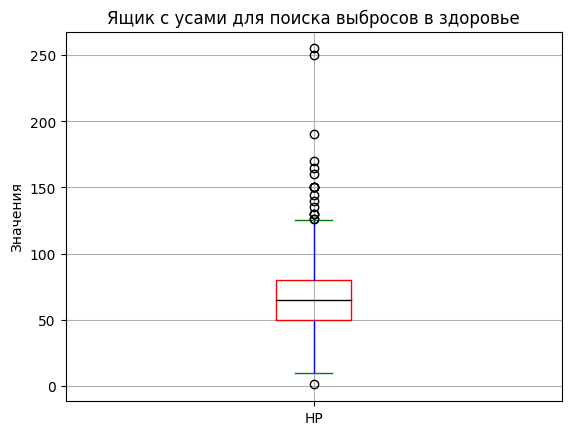

In [32]:
boxplot = pokemon.boxplot(column=['HP'],
    color=dict(boxes='red', whiskers='blue', medians='black', caps='green'))

plt.title('Ящик с усами для поиска выбросов в здоровье')

plt.ylabel('Значения')

plt.show()

Данный ящик построен по переменной HP.

Мы можем увидеть, что по ящику достаточно много выбросов, на рисунке выбросы - кружочки, которые заходят за усы ящика.
Это вполне логично. Медиана HP равна 65, при этом максимальные значения HP могут достигать 255.

Выбосов со слишком маленьким HP мало, но они тоже есть (один кружочк на рисунке)

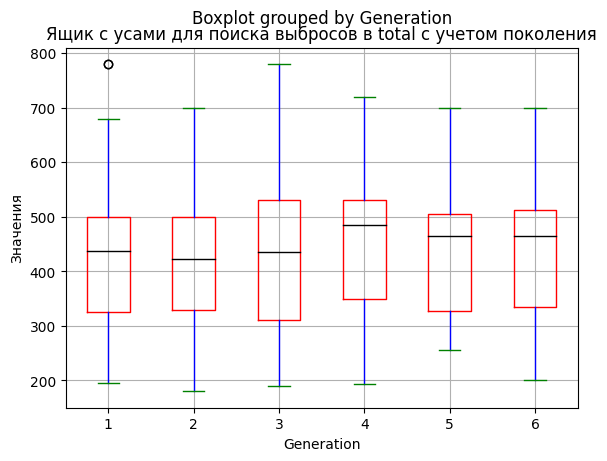

In [ ]:
boxplot = pokemon.boxplot(column=['Total'], by='Generation',
    color=dict(boxes='red', whiskers='blue', medians='black', caps='green'))

plt.title('Ящик с усами для поиска выбросов в total с учетом поколения')

plt.ylabel('Значения')

plt.show()

Создали ящик с разделением по поколениям, чтобы отследить возможные особенности, но ничего явного не заметно: медианы примерно на одном уровне, выбросов почти нет (только в 1 поколении). Только размер ящика в 3 распределении чуть больше остальных, но это просто говорит, что данные чуть более широко раскинуты от медианы

# Этап 3. Считаем выбросы

Находим выбросы межквартильным размахом

In [33]:
Q1 = pokemon['HP'].quantile(0.25)
Q3 = pokemon['HP'].quantile(0.75)
IQR = Q3 - Q1

TRASH1 = pokemon[(pokemon['HP'] < (Q1 - 1.5 * IQR)) | (pokemon['HP'] > (Q3 + 1.5 * IQR))]

print("Выбросы:")
TRASH1

Выбросы:


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_type
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False,Basic
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,Basic
142,131,Lapras,Water,Ice,535,130,85,80,85,95,60,1,False,Basic
145,134,Vaporeon,Water,NaN,525,130,65,60,110,95,65,1,False,Basic
155,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False,Basic
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False,Basic
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False,Basic
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False,Strong
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False,Basic
321,297,Hariyama,Fighting,NaN,474,144,120,60,40,60,50,3,False,Basic


Находим выбросы с помощью среднеквадратичного отклонения от среднего.

In [34]:
mean_pok = pokemon['HP'].mean()
std_pok = pokemon['HP'].std()

TRASH2 = pokemon[(pokemon['HP'] < (mean_pok - 3 * std_pok)) | (pokemon['HP'] > (mean_pok + 3 * std_pok))]

print("Выбросы:")
TRASH2

Выбросы:


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_type
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,Basic
155,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False,Basic
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False,Basic
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False,Basic
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False,Strong
351,321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False,Basic
473,426,Drifblim,Ghost,Flying,498,150,80,44,90,54,80,4,False,Basic
544,487,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True,Strong
545,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True,Strong
655,594,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False,Basic


Результаты немного отличаются: в случае выборосов с помощью среднеквадратичного у нас в основном это показатели, которые выше 150. При этом нет значений, которые ниже среднего
В случае межквартильного размаха у нас больше выбросов и начинаются с HP 126, при этом есть одно значение, которое значительно ниже срежнего: это HP == 1

# Этап 3. Удаляем выбросы и смотрим МЦТ

Удаляем выбросы (удаляем по межквартильному размаху)

In [35]:
pokemon_new = pokemon.drop(TRASH1.index)

In [36]:
pokemon_new.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,781.000000,781.00000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,363.449424,433.15493,67.291933,78.836108,74.125480,72.715749,71.752881,68.432778,3.331626
std,208.648690,119.32219,21.046086,32.263638,31.150085,32.716124,27.753200,29.124924,1.662215
min,1.000000,180.00000,10.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,185.000000,329.00000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,2.000000
50%,367.000000,446.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.000000
75%,541.000000,510.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.000000
max,721.000000,780.00000,125.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.000000


In [ ]:
pokemon_new['HP'].median()

65.0

In [ ]:
pokemon_new['HP'].mode()

0    60
dtype: int64

In [ ]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Как изменились МЦТ: особо изменений не произошло, поскольку мы избавились от выбросов в и без этого более-менее нормального распределения. Медиана = 65, мода = 60, а среднее = 67. До этого показатели были другими: медиана = 65, мода = 60 , среднее = 69
*мы специально показали это на примере такого распределения, которое является нормальным. Результат все же особо не изменились, но при этом среднее сместилось ближе к медиане и моде, а для некоторых реальных задач незначительное изменение МЦТ может быть очень важным.*

Этап 3. Поиск пропущенных значений

In [ ]:
propuski = pokemon_new.isnull().sum()

print("Пропущенные значения в каждой переменной:")
print(propuski)

Пропущенные значения в каждой переменной:
#               0
Name            0
Type 1          0
Type 2        374
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
Total_type      0
dtype: int64


# 4 этап. Корреляционная матрица

In [43]:
pokemon_new[pokemon_new.columns[4:9]].corr()

,Total,HP,Attack,Defense,Sp. Atk
Total,1.000000,0.693877,0.744213,0.621571,0.747851
HP,0.693877,1.000000,0.545832,0.352849,0.441923
Attack,0.744213,0.545832,1.000000,0.432581,0.393476
Defense,0.621571,0.352849,0.432581,1.000000,0.217231
Sp. Atk,0.747851,0.441923,0.393476,0.217231,1.000000


Будкс считать высокой корреляцией считается корреляция > 0.5

По матрице мы видим, что все признаки сильно коррелируют с признаком Total (и это абсолютно логично, так как признак Total - показатель общего уровня покемона, а общий уровень основывается на всез его показателях)

Также сильная корреляция наблюдается между уровнем здоровья и атакой покемонов (HP и Attack). Так что, если вас сильно атакует покемон, вероятно, у него еще и высокий уровень здоровья, так что убить его будет вдвойне сложно...

Защита покемона и специальная атака (Defense и Sp.Atk) не коррелируют ни с какими признакми, кроме HP.

# 4 этап. Диаграммы реассеяния

**Total и HP**

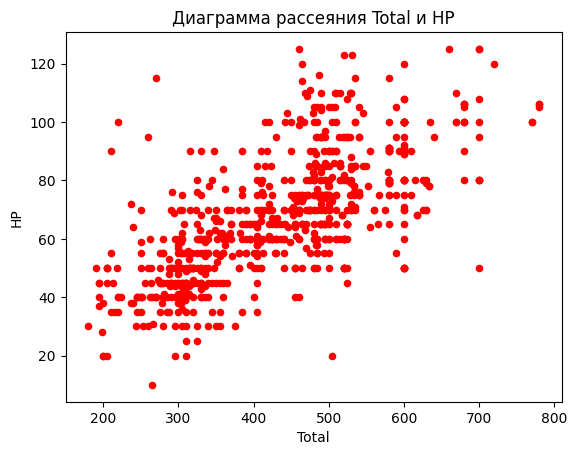

In [51]:
diag = pokemon_new.plot.scatter(x='Total', y='HP', color='red')
diag.set_title('Диаграмма рассеяния Total и HP')
plt.show()

Подтверждаем описанное выше: точки расположены вдоль прямой, но уже хаотично вписываются в эллипс, корреляция положительная

**Total и Attack**

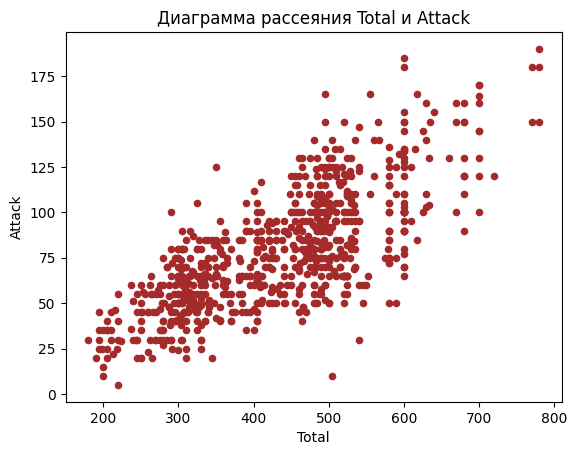

In [52]:
diag = pokemon_new.plot.scatter(x='Total', y='Attack', color='brown')
diag.set_title('Диаграмма рассеяния Total и Attack')
plt.show()

ситуация аналогичная с прошлой: точки расположены вдоль прямой, но уже хаотично вписываются в эллипс, корреляция положительная

**Total и Defense**

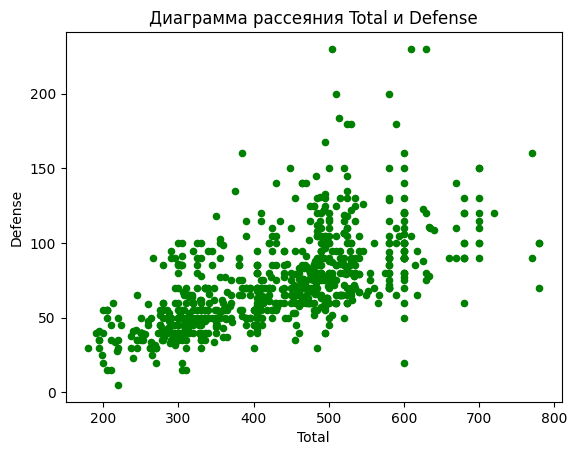

In [53]:
diag = pokemon_new.plot.scatter(x='Total', y='Defense', color='green')
diag.set_title('Диаграмма рассеяния Total и Defense')
plt.show()

на данном графике связь положительная, но стала явно слабее, все еще  прослеживается расположение вдоль прямой, на больших значениях (total > 550) линейная зависимость становится менее явной, практически исчезает.

**Total и Sp. Atk**

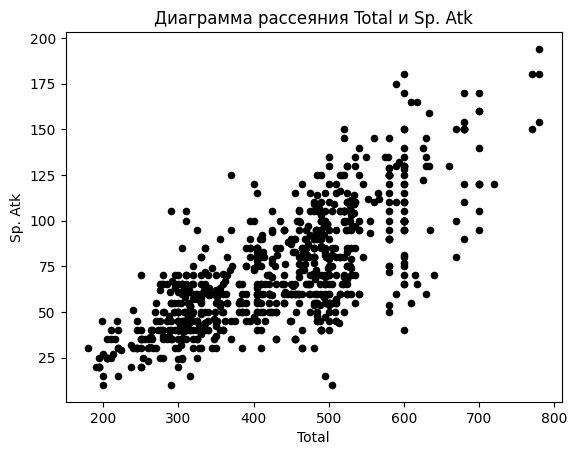

In [54]:
diag = pokemon_new.plot.scatter(x='Total', y='Sp. Atk', color='black')
diag.set_title('Диаграмма рассеяния Total и Sp. Atk')
plt.show()

точки расположены вдоль прямой, но уже хаотично вписываются в эллипс, корреляция положительная

**HP и Attack**

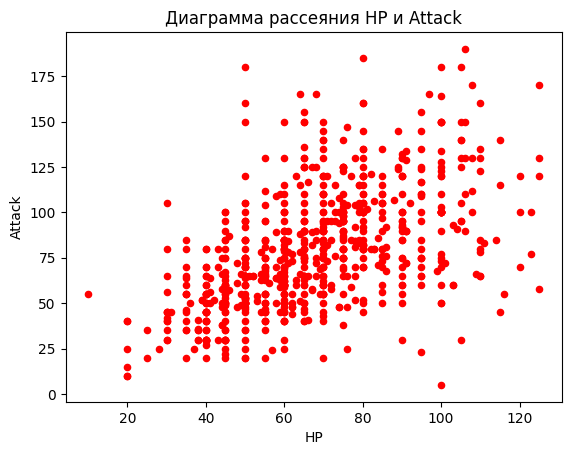

In [47]:
diag = pokemon_new.plot.scatter(x='HP', y='Attack', color='red')
diag.set_title('Диаграмма рассеяния HP и Attack')
plt.show()

слабая положительная корреляция, разброс точек от прямой очень сильный, но слабую линейную зависимось можно уловить

**HP и Defense**

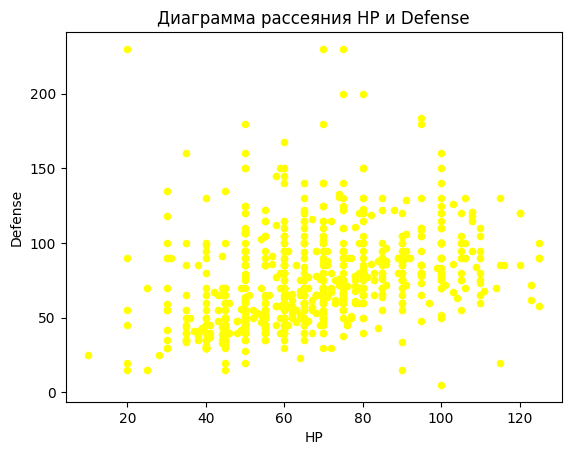

In [49]:
diag = pokemon_new.plot.scatter(x='HP', y='Defense', color='yellow')
diag.set_title('Диаграмма рассеяния HP и Defense')
plt.show()

Корреляци отсутствует

**HP и Sp. Atk**

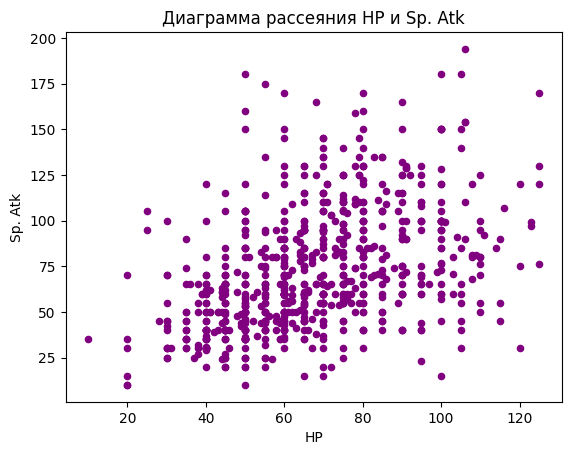

In [50]:
diag = pokemon_new.plot.scatter(x='HP', y='Sp. Atk', color='red')
diag.set_title('Диаграмма рассеяния HP и Sp. Atk')
plt.show()

Корреляци отсутствует

**Attack и Defense**

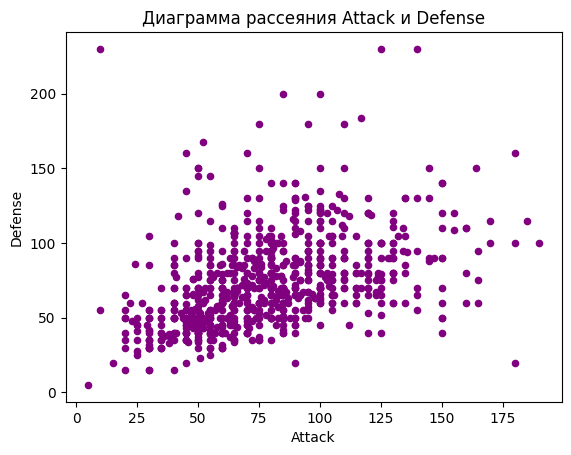

In [55]:
diag = pokemon_new.plot.scatter(x='Attack', y='Defense', color='brown')
diag.set_title('Диаграмма рассеяния Attack и Defense')
plt.show()

Корреляци отсутствует

**Attack м Sp. Atk**

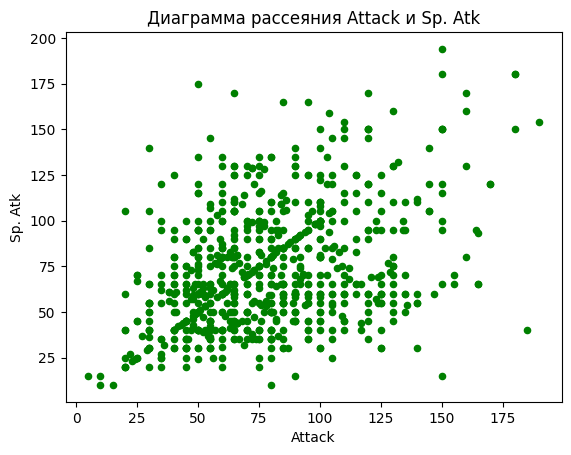

In [56]:
diag = pokemon_new.plot.scatter(x='Attack', y='Sp. Atk', color='green')
diag.set_title('Диаграмма рассеяния Attack и Sp. Atk')
plt.show()

На данном графие разброс от прямой достаточно сильный, но важно, что несмотря на разброс, мы можем четко увидеть прямую.

Скорее всего, покемены деляется н 2 вида:
1. Покемоны, у корых супер атака напрямую зависит от обыкновенной атаки
2. Покемоны, у которых супер атака никак не связана с супер атакой

У тех покемонов, у которых есть связь атака, положительная корреляция очень близкая к 1


# Defense и Sp. Atk

In [1]:
diag = pokemon_new.plot.scatter(x='Defense', y='Sp. Atk', color='blue')
diag.set_title('Диаграмма рассеяния Defense и Sp. Atk')
plt.show()

NameError: name 'pokemon_new' is not defined

In [ ]:
Корреляции нет